In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. \
Drop other two features for simplicity.\
Figure out if any preprocessing such as scaling would help here\
Draw elbow plot and from that figure out optimal value of k

# Import data

In [56]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [57]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df1 = df[['petal length (cm)', 'petal width (cm)', 'target']]
df1

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


# Scatter

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

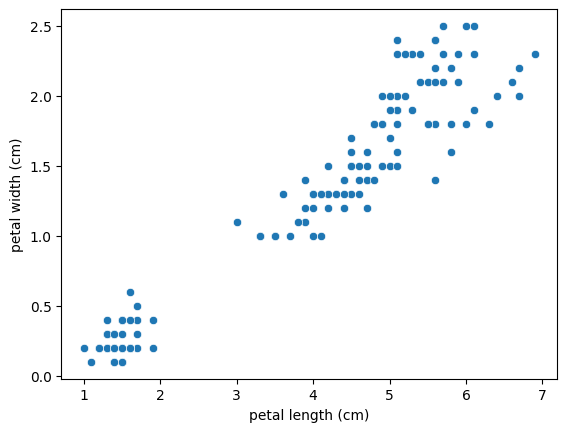

In [58]:
sns.scatterplot(df1, x='petal length (cm)', y='petal width (cm)')

# Model

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [65]:
# km = KMeans()
X = df[['petal length (cm)', 'petal width (cm)']]

In [66]:
k_range = range(1,10)
k_range

range(1, 10)

# Sum of Squared Error (SSE)

In [67]:
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is

## Elbow Plot

Text(0, 0.5, 'sse')

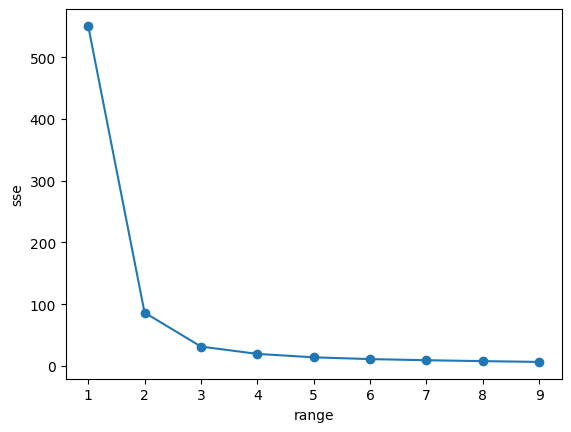

In [68]:
plt.plot(k_range, sse, marker='o')
plt.xlabel('range')
plt.ylabel('sse')

## Scatter k_range

c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is

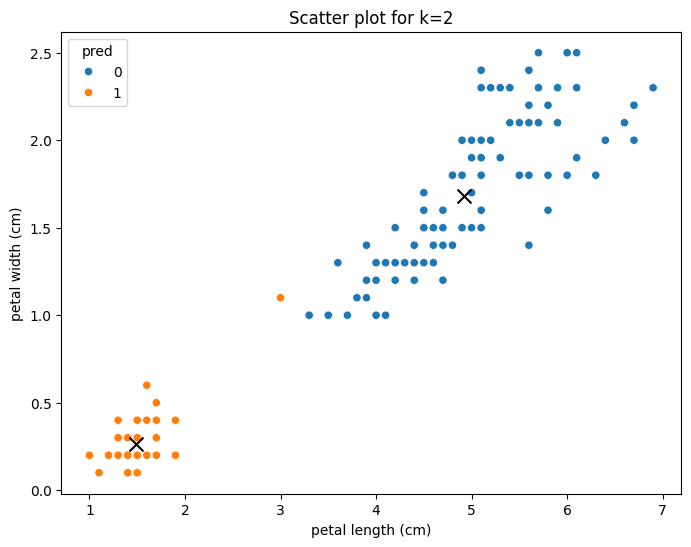

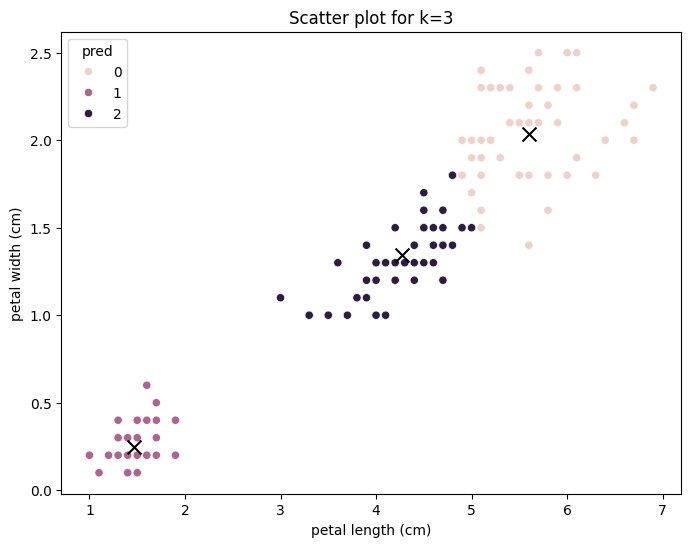

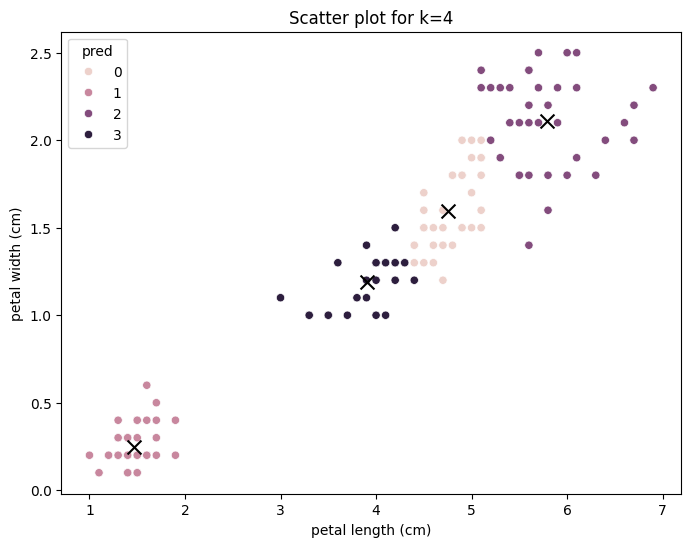

In [70]:
k_range = range(2,5)
# Create an empty list to store dataframes and cluster centers
dfs = []
cluster_centers_list = []

# Loop through each value of k
for k in k_range:
    km = KMeans(n_clusters=k)
    y_pred = km.fit_predict(X)
    df_k = df1.copy()
    df_k['pred'] = y_pred
    dfs.append(df_k)
    cluster_centers_list.append(km.cluster_centers_) # Append the cluster centers to the list

for i, df_k in enumerate(dfs):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_k, x='petal length (cm)', y='petal width (cm)', hue='pred')
    plt.scatter(cluster_centers_list[i][:, 0], cluster_centers_list[i][:, 1], c='black', marker='x', s=100, label='Cluster Centers')
    plt.title(f"Scatter plot for k={k_range[i]}")
    plt.show()

# Fit & Predict

In [ ]:
km = KMeans(n_clusters=3)
y_pred2 = km.fit_predict(X)
y_pred2


c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
cm = confusion_matrix(df['target'].values, y_pred2)
cm

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 15,  0]], dtype=int64)

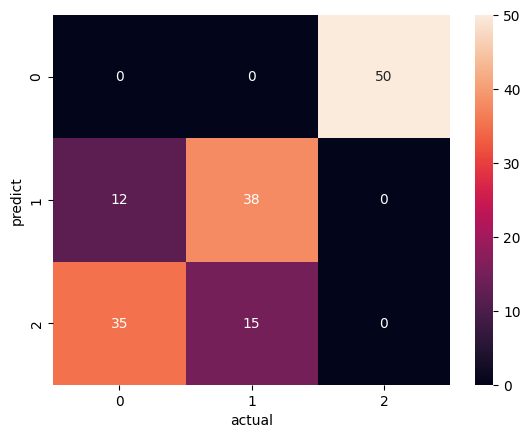

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('actual')
plt.ylabel('predict')
plt.show()

In [72]:
df2=df1.copy()
df2['pred'] = y_pred2
df2

,petal length (cm),petal width (cm),target,pred
0,1.4,0.2,0,2
1,1.4,0.2,0,2
2,1.3,0.2,0,2
3,1.5,0.2,0,2
4,1.4,0.2,0,2
...,...,...,...,...
145,5.2,2.3,2,0
146,5.0,1.9,2,1
147,5.2,2.0,2,0
148,5.4,2.3,2,0


C:\Users\84393\AppData\Local\Temp\ipykernel_29996\54289628.py:8: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df2, x='petal length (cm)', y='petal width (cm)', hue='pred', style='pred', markers=['X'], s=40, alpha=0.5)


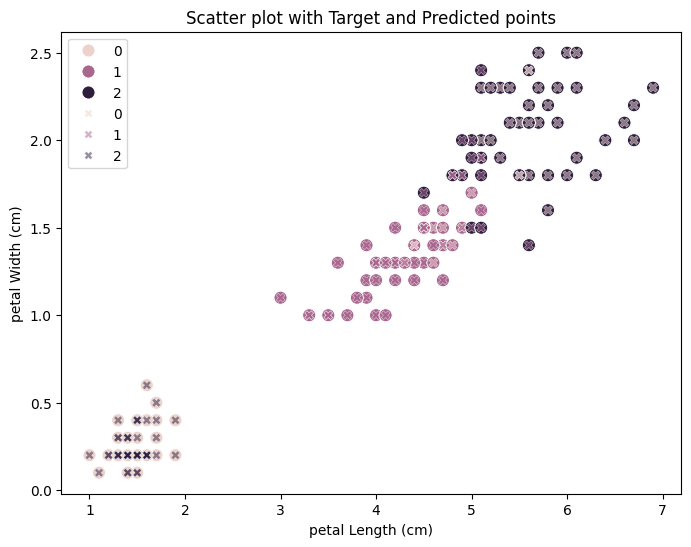

In [89]:
# Create a scatter plot with target points (using circles)
plt.figure(figsize=(8, 6))

# Plot actual data points
sns.scatterplot(data=df2, x='petal length (cm)', y='petal width (cm)', hue='target', s=90, alpha=1)

# Plot predicted data points on top
sns.scatterplot(data=df2, x='petal length (cm)', y='petal width (cm)', hue='pred', style='pred', markers=['X'], s=40, alpha=0.5)

# Add legend
plt.legend()

# Set title and labels
plt.title("Scatter plot with Target and Predicted points")
plt.xlabel("petal Length (cm)")
plt.ylabel("petal Width (cm)")

# Show the plot
plt.show()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

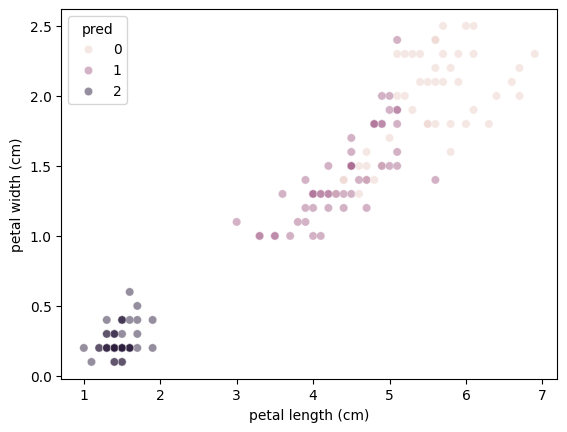

In [93]:
sns.scatterplot(data=df2, x='petal length (cm)', y='petal width (cm)', hue='pred', alpha=0.5)